In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [3]:
#the data is tab seperated, hence sep='\t'
df = pd.read_csv('u.data', sep='\t', names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
#merging two dataframes
df = pd.merge(df, movie_titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [6]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [7]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [8]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:ylabel='Count'>

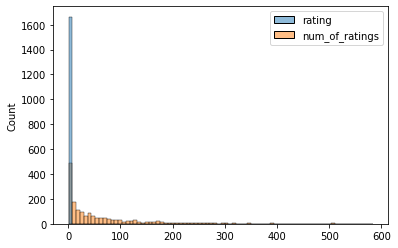

In [9]:
sns.histplot(data=ratings, bins=80)

<AxesSubplot:xlabel='rating', ylabel='Count'>

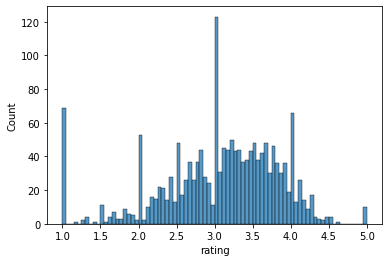

In [10]:
sns.histplot(ratings['rating'], bins=80)

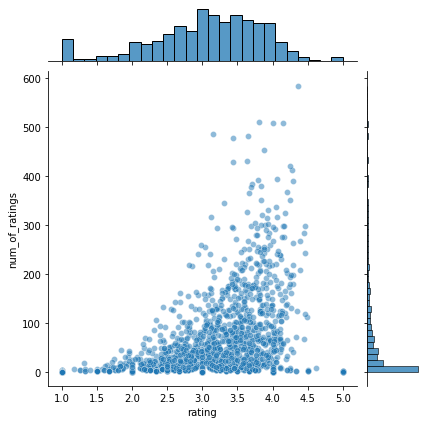

In [11]:
sns.jointplot(x='rating', y='num_of_ratings', data=ratings, alpha=0.5)

In [12]:
#to make a matrix
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#to choose movies from most rated movies - chose star wars, liar liar
ratings.sort_values('num_of_ratings', ascending=False).head(10)

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [15]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
print(starwars_user_ratings.head())
print(liarliar_user_ratings.head())

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64
user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64


In [16]:
#using corrwith to get correlation between two dataframes
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)
print(similar_to_starwars.head(10))
print(similar_to_liarliar.head(10))

C:\Users\mmdas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\mmdas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
dtype: float64
title
'Til There Was You (1997)                      0.118913
1-900 (1994)                                        NaN
101 Dalmatians (1996)                          0.469765
12 Angry Men (1957)                            0.066272
187 (1997)                                     0.175145
2 Days in the Valley (1996)                    0.040739
20,000 Leagues Under the Sea (1954)           -0.027932
2001: A Space Odyssey

In [ ]:
#this gives us a pattern which is similar to the pattern of rating a movie by a user
#eg - user 0 rated certain movies including star wars, so this gives us a similar pattern of ratings by all the users for all movies

In [18]:
#making a database for it
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head(10)

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [23]:
corr_starwars.sort_values(by='correlation' ,ascending=False, inplace=True)
corr_starwars.head(10)
#the problem with this is that, even though it says these movies have perfect correlation with star wars, they may not
#as one person who watched star wars and some other weird movie gave both the movies 5 stars
#hence, to solve this problem, filter results by a threshold of number of reviews

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [24]:
corr_starwars = corr_starwars.join(ratings['num_of_ratings'])
corr_starwars.head(10)

,correlation,num_of_ratings
title,,
Hollow Reed (1996),1.0,6
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5
Star Wars (1977),1.0,584
Man of the Year (1995),1.0,9
"Beans of Egypt, Maine, The (1994)",1.0,2
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5


In [26]:
corr_starwars[corr_starwars['num_of_ratings']>100].head(10)
#this gives an apprpriate result

,correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [29]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar.head(10)

,correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
"20,000 Leagues Under the Sea (1954)",-0.027932
2001: A Space Odyssey (1968),-0.057864
"39 Steps, The (1935)",0.400918
8 1/2 (1963),0.178064


In [30]:
corr_liarliar = corr_liarliar.join(ratings['num_of_ratings'])
corr_liarliar.head(10)

,correlation,num_of_ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
"20,000 Leagues Under the Sea (1954)",-0.027932,72
2001: A Space Odyssey (1968),-0.057864,259
"39 Steps, The (1935)",0.400918,59
8 1/2 (1963),0.178064,38


In [32]:
corr_liarliar.sort_values('correlation', ascending=False, inplace=True)
corr_liarliar.head(10)

,correlation,num_of_ratings
title,,
"Bonheur, Le (1965)",1.0,4
For Ever Mozart (1996),1.0,3
Crossfire (1947),1.0,4
Johnny 100 Pesos (1993),1.0,2
Moonlight and Valentino (1995),1.0,7
Mina Tannenbaum (1994),1.0,6
"Stranger, The (1994)",1.0,3
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0,3
Legal Deceit (1997),1.0,5


In [34]:
corr_liarliar[corr_liarliar['num_of_ratings']>100].head(10)

,correlation,num_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
